In [1]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing import load_data, filter_products, clean_text, add_narrative_stats, save_data


1. Load the raw dataset

In [2]:
data_path = "../data/raw/complaints.csv"
df = load_data(data_path)
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

c:\Users\HP\Downloads\Intelligent Complaint Analysis\notebooks\../src\data_preprocessing.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, parse_dates=['Date received', 'Date sent to company'])


Dataset shape: (9609797, 18)
Columns: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications 

2. Identify complaints with/without narratives

In [3]:
num_with_narrative = df['Consumer complaint narrative'].notna().sum()
num_without_narrative = df['Consumer complaint narrative'].isna().sum()
print(f"Complaints with narratives: {num_with_narrative}")
print(f"Complaints without narratives: {num_without_narrative}")

Complaints with narratives: 2980756
Complaints without narratives: 6629041


3. Filter dataset

In [4]:
products = ["Credit card", "Personal loan", "Savings account", "Money transfers"]
df = filter_products(df, products)
print("After filtering:", df.shape)

After filtering: (82164, 18)


4. Clean narratives

In [5]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)

df = add_narrative_stats(df)

5. Exploratory Data Analysis

Distribution of complaints per product

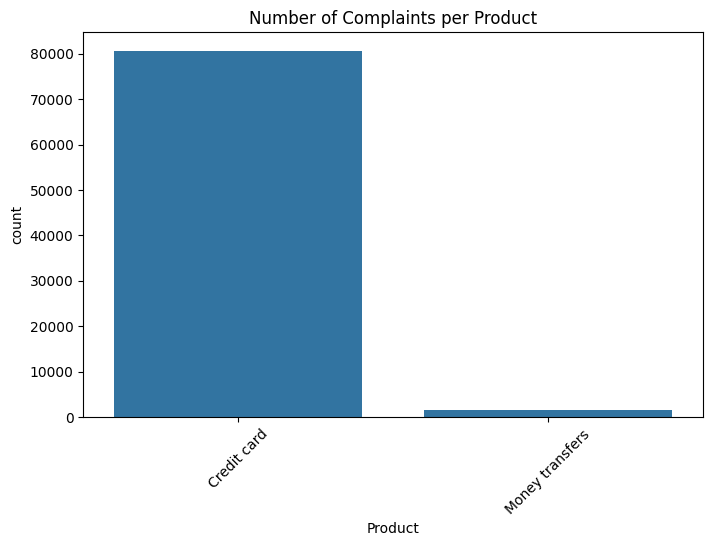

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Complaints per Product")
plt.show()

Narrative length distribution (characters)

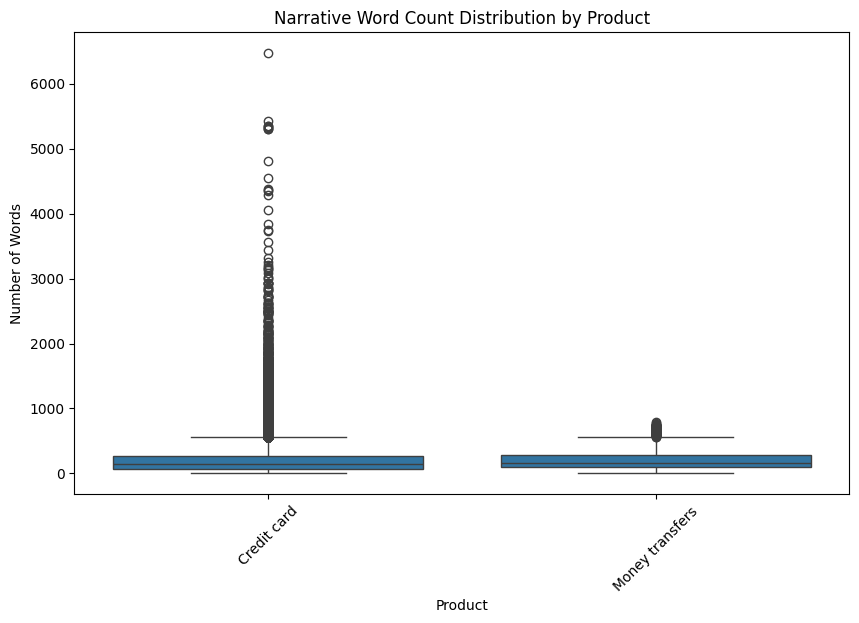

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product', y='narrative_word_count')
plt.title("Narrative Word Count Distribution by Product")
plt.ylabel("Number of Words")
plt.xticks(rotation=45)
plt.show()


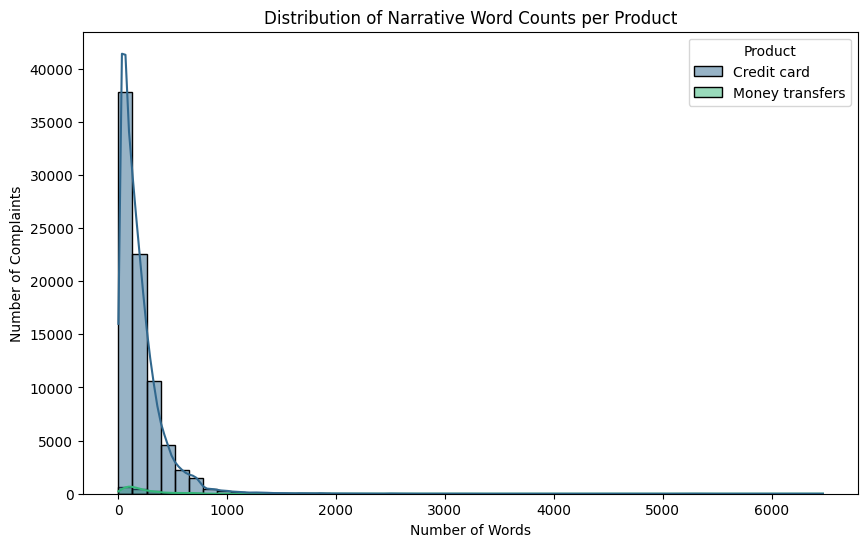

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='narrative_word_count', hue='Product', bins=50, kde=True, palette="viridis", alpha=0.5)
plt.title("Distribution of Narrative Word Counts per Product")
plt.xlabel("Number of Words")
plt.ylabel("Number of Complaints")
plt.show()

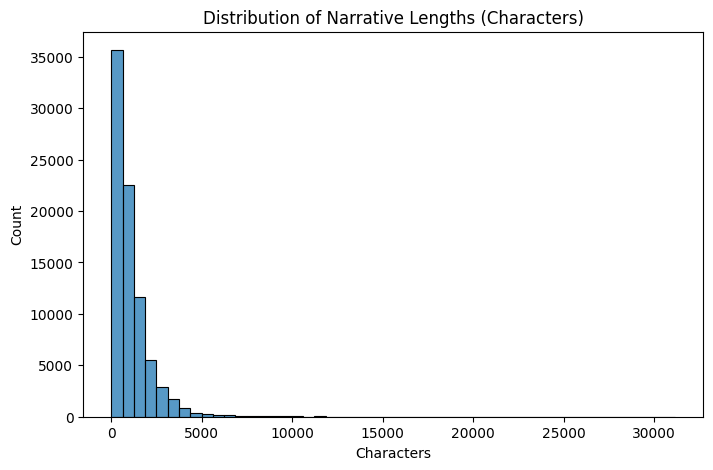

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['narrative_char_count'], bins=50)
plt.title("Distribution of Narrative Lengths (Characters)")
plt.xlabel("Characters")
plt.show()

Narrative length distribution (words)

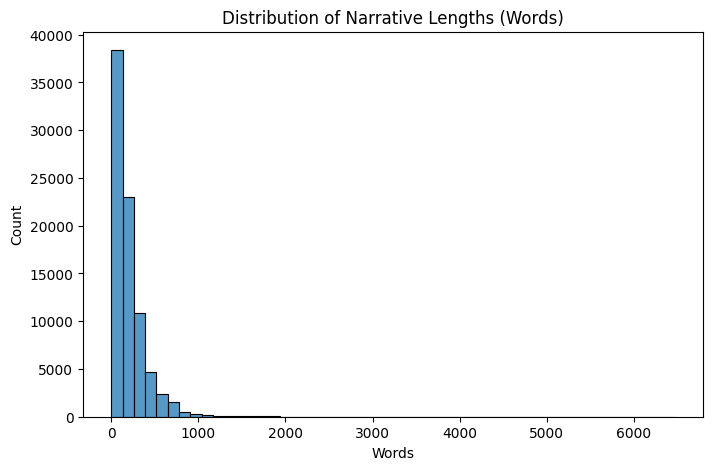

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['narrative_word_count'], bins=50)
plt.title("Distribution of Narrative Lengths (Words)")
plt.xlabel("Words")
plt.show()

6. Save cleaned and filtered dataset

In [16]:
save_path = "../data/processed/filtered_complaints.csv"
save_data(df, save_path)
print(f"Cleaned dataset saved to {save_path}")

Cleaned dataset saved to ../data/processed/filtered_complaints.csv
